#### 1. Import data

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 2. Visualize data

<function matplotlib.pyplot.show(close=None, block=None)>

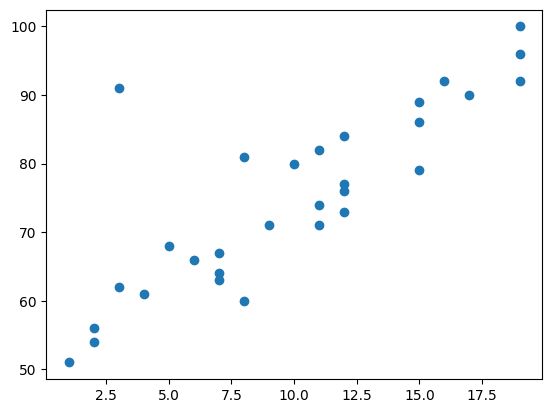

In [11]:
data = pd.read_csv("data.csv")
plt.scatter(data.studytime, data.score)
plt.show

### 3. Create the loss function

In [34]:
def mean_squared_error(m, b, points):
  total_error = 0
  n = len(points)
  for i in range(n):
      x = points.iloc[i].studytime
      y = points.iloc[i].score
      predicted_y = m * x + b
      total_error += (y - predicted_y) ** 2
    
    # Prevent division by zero in case of n == 0
  if n == 0:
      return None
  return total_error / n
  

#### 4. Implement gradient decent

In [35]:
def gradient_decent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0
  
  n = len(points)
  
  for i in range(n):
    x = points.iloc[i].studytime
    y = points.iloc[i].score
    
    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))
    
  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  
  return m, b

## Run model

Epoch 0, m: 0, b: 0, Loss: 5825.6
Epoch 50, m: 6.263188131918296, b: 1.0900865602661785, Loss: 692.0251163990239
Epoch 100, m: 6.223894718168187, b: 1.6787781871994343, Loss: 678.0982473441144
Epoch 150, m: 6.178228297777383, b: 2.260492712740873, Loss: 664.480520111879
Epoch 200, m: 6.133054250654798, b: 2.835840064659737, Loss: 651.1592409032147
Epoch 250, m: 6.088374604038031, b: 3.4048905109418945, Loss: 638.1279562531789
Epoch 300, m: 6.044183955040146, b: 3.967712968880621, Loss: 625.3803531911694
Epoch 350, m: 6.000476951822014, b: 4.524375600867226, Loss: 612.9102561753608
Epoch 400, m: 5.957248301109037, b: 5.074945823287161, Loss: 600.7116241009825
Epoch 450, m: 5.914492767558996, b: 5.619490314685368, Loss: 588.7785473737192
Epoch 500, m: 5.872205173128021, b: 6.158075023841623, Loss: 577.1052450468269
Epoch 550, m: 5.830380396443485, b: 6.690765177757451, Loss: 565.6860620205662
Epoch 600, m: 5.789013372183766, b: 7.217625289555652, Loss: 554.5154663026058
Epoch 650, m: 5.7

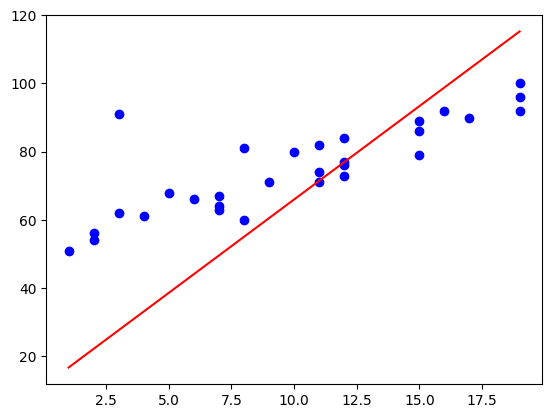

In [39]:
m = 0
b = 0
L = 0.0005
epochs = 10000

for i in range(epochs):
  if i % 50 == 0:
    current_loss = mean_squared_error(m, b, data)
    print(f"Epoch {i}, m: {m}, b: {b}, Loss: {current_loss}")
  m, b = gradient_decent(m, b, data, L)
  
print(f"m: {m}, b: {b}")

# Scatter the data
plt.scatter(data.studytime, data.score, color="blue")
# Linear line
x_range = np.linspace(data.studytime.min(), data.studytime.max(), 100)
plt.plot(x_range, m * x_range + b, color="red")


plt.show()